In [19]:
import os

import tmap

import pool.utils.data_prep
from pool.utils import model_utils
from pool.model import DualCRBMRelu, PoolCRBMRelu, PCRSpecificity
import pool.analysis.analysis_methods as am
import pool.analysis.analysis_methods_crbm as amc

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import torch
import json
import math
import subprocess as sp
import matplotlib.image as mpimg

In [20]:
# Directory of Stored CRBMs
mdir = "/home/jonah/PycharmProjects/pool_harmonium/datasets/cov/trained/"
runfile = "/home/jonah/PycharmProjects/pool_harmonium/datasets/cov/run_files/enriched_specificity.yaml"

config = model_utils.load_run(runfile)
rounds = [config["name"]]

train_fastas = config["fasta_file"]
if type(train_fastas) is list:
    data_keys = [x.split(".")[0] for x in train_fastas]
else:
    data_keys = [train_fastas.split(".")[0]]

In [21]:
# Get's checkpoint and directory for latest version of the trained model
checkp, version_dir = am.get_checkpoint_path(rounds[0], model_dir=mdir) #, version=25)

# load crbm
# ncrbm = DualCRBMRelu.load_from_checkpoint(checkp)
ncrbm = PCRSpecificity.load_from_checkpoint(checkp)
ncrbm.eval()
ncrbm.data_sampler.set_device('cuda')

In [22]:
checkp

'/home/jonah/PycharmProjects/pool_harmonium/datasets/cov/trained/cov_spec_enriched/version_97/checkpoints/epoch=499-step=25000.ckpt'

In [23]:
# Generate Weight PDF inside mdir/version_dir
# order weights by descending l2 norm
model_utils.all_weights(ncrbm, name=version_dir + rounds[0] + "_unordered", order_weights=False)
model_utils.all_weights(ncrbm, name=version_dir + rounds[0] + "_ordered", order_weights=True)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

<Figure size 700x2500 with 0 Axes>

In [ ]:
# View individual weight

am.view_weights_crbm(ncrbm, ncrbm.hidden_convolution_keys[0], sort="top", selected=list(range(10)), alphabet="dna")

In [16]:
# Put all data into dictionary
# dir(s) is location of fasta file used during training
# optional assignment for
all_data = am.fetch_data(data_keys, directory="../data/", alphabet=ncrbm.alphabet, assignment_function=None, threads=12, drop_duplicates=False)

# Assign data to train, valid, testy under round column
# Generated during model training
with open(version_dir + "dataset_indices.json", "r") as json_file:
    di = json.load(json_file)

print("Total Sequences:", all_data.index.__len__())

new_rounds = np.full((all_data.index.__len__()), "valid")
new_rounds[di["train_indices"]] = "train"
new_rounds[di["test_indices"]] = "testy"

all_data["round"] = new_rounds.tolist()

Process Time 0.015025615692138672
Total Sequences: 14714


In [17]:
# calculate likelihoods and fitness values
import torch
# device = torch.device("cpu")
# ncrbm.to(device)
# ncrbm.eval()

am.generate_likelihoods(ncrbm, all_data, f"cov_likelihoods_b", key='round', out_dir="./generated/")
am.generate_likelihoods(ncrbm, all_data, f"cov_likelihoods_ind_b", key='round', out_dir="./generated/", individual_hiddens=True)


Learning betas...
Elapsed time: 17.547740697860718, Acceptance rates: tensor([1.0603, 1.0654, 1.0424, 1.0346, 1.0296, 1.0225, 1.0195, 1.0131, 1.0084,
        1.0039], device='cuda:0')
Initial evaluation: log(Z) = tensor([86.9296], device='cuda:0')
Iteration 2000, beta: 0.10000000149011612
Current evaluation: log(Z)= tensor(86.9276, device='cuda:0') +- tensor(4.1837e-05, device='cuda:0')
Iteration 4000, beta: 0.20000000298023224
Current evaluation: log(Z)= tensor(86.9281, device='cuda:0') +- tensor(0.0001, device='cuda:0')
Iteration 6000, beta: 0.30000001192092896
Current evaluation: log(Z)= tensor(86.9341, device='cuda:0') +- tensor(0.0002, device='cuda:0')
Iteration 8000, beta: 0.4000000059604645
Current evaluation: log(Z)= tensor(86.9480, device='cuda:0') +- tensor(0.0003, device='cuda:0')
Iteration 10000, beta: 0.5
Current evaluation: log(Z)= tensor(86.9723, device='cuda:0') +- tensor(0.0004, device='cuda:0')
Iteration 12000, beta: 0.6000000238418579
Current evaluation: log(Z)= tens

In [18]:
# read in generated likelihoods
ncrbm_likelihoods = am.get_likelihoods("./generated/cov_likelihoods_b.json")
ncrbm_likelihoods_ind = am.get_likelihoods("./generated/cov_likelihoods_ind_b.json")

In [19]:
for r in ['train', 'valid', 'testy']:
    all_data.loc[all_data["round"] == r, 'likelihood'] = ncrbm_likelihoods["likelihoods"][r]

empty_list = np.array([None for _ in range(len(all_data))])

for r in ['train', 'valid', 'testy']:
    empty_list[list(all_data.loc[all_data["round"] == r].index)] = ncrbm_likelihoods_ind["likelihoods"][r]

all_data['likelihood_ind'] = empty_list

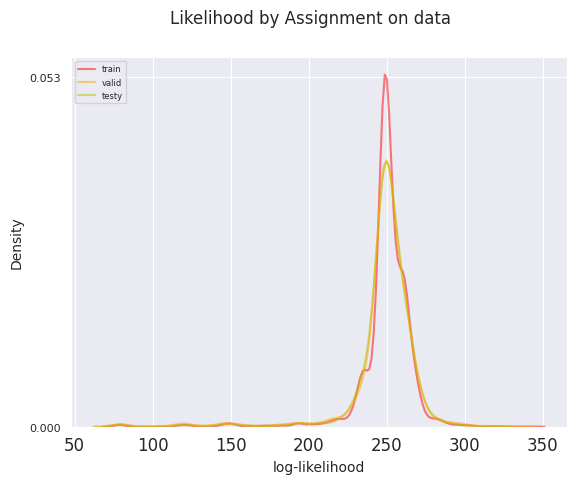

In [20]:
rs_list = [["train"], ["valid"], ["testy"]]
rs_list_t = [list(x) for x in zip(*rs_list)]

am.plot_likelihoods_multiple(ncrbm_likelihoods["likelihoods"], rs_list_t, rs_list_t, title=f"Likelihood by Assignment on data", xlim=None, legend_font_size=6)

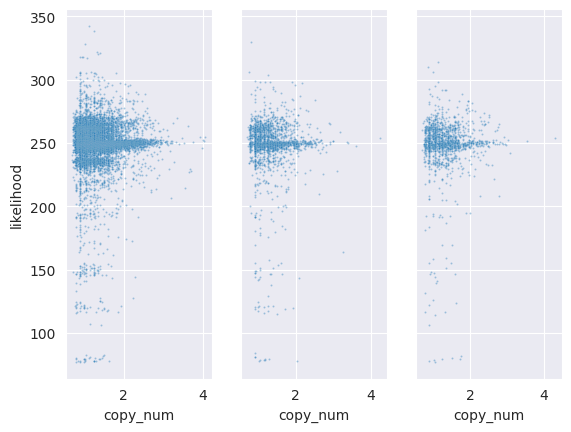

In [21]:
# Compare copy_num (Enrichment Value) vs Model Likelihood
fig, axs = plt.subplots(1, 3, sharey=True)
sns.scatterplot(data=all_data.loc[all_data["round"] == "train"], x="copy_num", y="likelihood", ax=axs[0], alpha=0.4, s=2.0)
sns.scatterplot(data=all_data.loc[all_data["round"] == "valid"], x="copy_num", y="likelihood", ax=axs[1], alpha=0.4, s= 2.0)
sns.scatterplot(data=all_data.loc[all_data["round"] == "testy"], x="copy_num", y="likelihood", ax=axs[2], alpha=0.4, s= 2.0)
plt.show()